In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D as Conv2D, MaxPooling2D as MaxPool2D

In [2]:
data = []
labels = []
classes = 5
cur_path = os.getcwd()

#there are 43 kinds of traffic sign boards in the dataset, hence the no. of of classes is taken as 43.
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train_own',str(i+1))
    images = os.listdir(path)

    #we open each folder and extract the images and store in the list data[]
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i+1)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
#We need to convert the list into numpy arrays for feeding to the model.
data = np.array(data)
labels = np.array(labels)

# we have stored all the images and their labels into lists (data and labels).


In [13]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
#random_state indicates the highest number of the folder
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)


(99, 30, 30, 3) (99,)
(79, 30, 30, 3) (20, 30, 30, 3) (79,) (20,)


In [16]:
#Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
#we first add two 2-D convolutional layers to the model with 32 filters each
#kernel size is 5*5 which will move around the image to get features.
#activation function used is rectified linear (ReLu) fuction.

model.add(MaxPool2D(pool_size=(2, 2)))
#then we do max pooling, to reduce the amount of parameters and computation in the network.

model.add(Dropout(rate=0.25))
#Dropout is a technique where randomly selected neurons are ignored during training to prevent overfitting

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
#now again two convolutional layers with 64 filters each and 3*3 kernel size are added  and maxpooling, dropout is done

model.add(Flatten())
#a flattening layer is used to convert data/image into 1-D array

model.add(Dense(256, activation='relu'))
#a dense layer is added,for being fully connected to the previous layer

model.add(Dropout(rate=0.5))
#dropout layer added to avoid overfitting

model.add(Dense(6, activation='softmax'))
#a softmax layer is added to convert an array of numbers into array of probabilities of occurence of a feature

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss is “categorical_crossentropy” because we have multiple classes to categorise.
#metrics is chosen to be accuracy, because we wish to optimise it
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [18]:
#epoch is the number of times the neural network is trained with the whole dataset
#in each epoch the dataset is divided into batches of size 32
#we train the model with the training dataset divided and validate using validating dataset
epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/40
3/3 [==============================] - 0s 91ms/step - loss: 1.2277 - accuracy: 0.4557 - val_loss: 1.2714 - val_accuracy: 0.5500
Epoch 2/40
3/3 [==============================] - 0s 73ms/step - loss: 1.0287 - accuracy: 0.6709 - val_loss: 1.4188 - val_accuracy: 0.4500
Epoch 3/40
3/3 [==============================] - 0s 76ms/step - loss: 0.8921 - accuracy: 0.6203 - val_loss: 1.1916 - val_accuracy: 0.5500
Epoch 4/40
3/3 [==============================] - 0s 72ms/step - loss: 0.7828 - accuracy: 0.7089 - val_loss: 1.0160 - val_accuracy: 0.6500
Epoch 5/40
3/3 [==============================] - 0s 76ms/step - loss: 0.9620 - accuracy: 0.5949 - val_loss: 1.0776 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 0s 71ms/step - loss: 0.7347 - accuracy: 0.7468 - val_loss: 1.1192 - val_accuracy: 0.5000
Epoch 7/40
3/3 [==============================] - 0s 75ms/step - loss: 0.7840 - accuracy: 0.6709 - val_loss: 1.0318 - val_accuracy: 0.5500
Epoch 8/40
3/3 [===========

In [21]:
#testing accuracy on test dataset
data = []
labels = []
classes = 5
cur_path = os.getcwd()

#there are 43 kinds of traffic sign boards in the dataset, hence the no. of of classes is taken as 43.
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'test_own',str(i+1))
    images = os.listdir(path)

    #we open each folder and extract the images and store in the list data[]
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i+1)
        except:
            print("Error loading image")



#we access all the test images from each folder in test dataset and convert it into numpy array    
X_test=np.array(data)

predict_x=model.predict(X_test)       #predicted values
classes_x=np.argmax(predict_x,axis=1) #Actual values
print(classes_x)
print(labels)

#pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x)) 
#Then we check the accuracy of our classification model which is 96%

[1 1 5 2 2 2 3 3 3 4 4 4 5 5 5]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]
0.9333333333333333


In [22]:
model.save('tsr_own.h5')

In [23]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(classes_x, labels)

print(cf_matrix)

[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [1 0 0 0 3]]


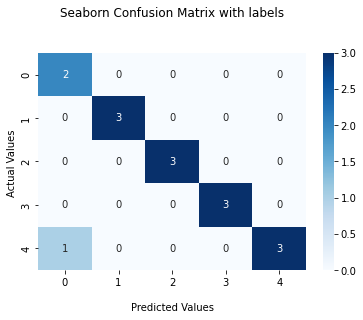

In [24]:
import seaborn as sns

ax = sns.heatmap(cf_matrix,annot=True,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
#Dark colour indicates more predictions for those values
plt.show()

In [25]:
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)
FP = FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
ACC = (TP+TN)/(TP+FP+FN+TN)
print("TPR =",TPR)
print("TNR =",TNR)
print("FPR =",FPR)
print("FNR =",FNR)
print("Accuracy =",ACC)

TPR = 0.9333333333333333
TNR = 0.9833333333333333
FPR = 0.016666666666666666
FNR = 0.06666666666666667
Accuracy = 0.9733333333333334
